<a href="https://colab.research.google.com/github/alickqs/kodiim/blob/main/hw1" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# титаник:

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.metrics import mean_absolute_error

In [ ]:
# Загрузим датасет
data = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")
X = data.drop("survived", axis = 1)
y = data["survived"]

In [ ]:
# Заменим категориальные переменные на числовые (слова на цифры, потому что наша модель понимает только цифры)
X['sex'] = X['sex'].map({'female': 0, 'male': 1})
# Удалим столбцы, которые мы не будем использовать в качестве признаков
X = X.drop(['name', 'ticket', 'cabin', 'embarked', 'home.dest', 'boat'], axis=1)
# Заполним пропущенные значения средними значениями

In [ ]:
# Заполняем пропуски средними значениями
X = X.fillna(X.mean ())
y = y.fillna(y.mean ())

In [ ]:
#делим на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Напишем свой класс для классификации

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Метод для обучения модели на тренировочных данных.

        Parameters:
        - X_train: массив признаков тренировочных данных
        - y_train: массив целевых значений тренировочных данных
        """
        # Заменяем пропуски на np.nan
        self.X_train = X_train.apply(pd.to_numeric, errors='coerce').values
        self.y_train = y_train.values

    def predict(self, X_test):
        """
        Метод для предсказания классов на тестовых данных.

        Parameters:
        - X_test: массив признаков тестовых данных

        Returns:
        - y_pred: массив предсказанных классов
        """
        # Заменяем пропуски на np.nan
        X_test = X_test.replace('', np.nan)
        X_test = X_test.apply(pd.to_numeric, errors='coerce').values

        y_pred = []
        # проходимся по всем строкам, для каждой нужно сделать предсказание

        for y, x in X_test.iterrows():
            # считаем расстояния до всех строк из трейна
            distances = sum((X.loc[10] - X.loc[11]) ** 2)

            # Индексы ближайших соседей
            indices = np.argsort(distances)[:self.k]

            # Значения целевой переменной для соседей
            neighbors_values = self.y_train[indices]
            # Находим наиболее часто встречающийся класс среди соседей
            most_common_class = knn.predict(np.array([[2, 0], [0, 2]]))
            y_pred.append(most_common_class)

        return np.array(y_pred)

In [ ]:
# Напишем свой класс для регрессии

class KNNRegressor:
    def __init__(self, k=13):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Метод для обучения модели на тренировочных данных.

        Parameters:
        - X_train: массив признаков тренировочных данных
        - y_train: массив целевых значений тренировочных данных
        """
        # Заменяем пропуски на np.nan
        X_train.replace('', np.nan, inplace=True)
        X_train = X_train.apply(pd.to_numeric, errors='coerce')
        X_train = X_train.dropna()
        self.X_train = X_train.values

        # Заменяем пропуски на np.nan
        y_train.replace('', np.nan, inplace=True)
        y_train = y_train.apply(pd.to_numeric, errors='coerce')
        y_train = y_train.dropna()
        self.y_train = y_train.values

    def predict(self, X_test):
        """
        Метод для предсказания значений на тестовых данных.

        Parameters:
        - X_test: массив признаков тестовых данных

        Returns:
        - y_pred: массив предсказанных значений
        """
        # Заменяем пропуски на np.nan
        X_test.replace('', np.nan, inplace=True)
        X_test = X_test.apply(pd.to_numeric, errors='coerce')
        X_test = X_test.dropna()
        X_test = X_test.values

        y_pred = []
        # проходимся по всем строкам, для каждой нужно сделать предсказание
        count = 0
        for y, x in X_test.iterrows():
            # считаем расстояния до всех строк из трейна
            distances = sum((X.loc[count] - X.loc[count+1]) ** 2)
            count += 1

            # Индексы ближайших соседей
            indices = np.argsort(distances)[:self.k]

            # Значения целевой переменной для соседей
            neighbors_values = self.y_train[indices]
            # берем среднее среди соседей
            most_common_class = knn.predict(np.array([[2, 0], [0, 2]]))
            y_pred.append(most_common_class)

        return np.array(y_pred)

In [ ]:
print(X_train)

      pclass  sex        age  sibsp  parch     fare        body
808        3    1  29.881135      0      0   8.0500  160.809917
1090       3    0  23.000000      0      0   8.6625  160.809917
1222       3    1  33.000000      0      0   8.6625  160.809917
279        1    1  62.000000      0      0  26.5500  160.809917
263        1    0  39.000000      1      0  55.9000  160.809917
...      ...  ...        ...    ...    ...      ...         ...
257        1    0  35.000000      1      0  57.7500  160.809917
967        3    0  45.000000      0      0   7.7500  160.809917
1019       3    1  24.000000      0      0   7.8958  160.809917
203        1    1  28.000000      1      0  82.1708  160.809917
301        1    1  47.000000      0      0  34.0208  160.809917

[981 rows x 7 columns]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Инициализируем модель KNNClassifier с количеством соседей, равным 3
neigh = KNeighborsClassifier(n_neighbors=3)
# Обучаем модель на тренировочных данных
neigh.fit(X_train, y_train)
# Предсказываем значения на тестовых данных
y_pred = neigh.predict(X_test)

In [ ]:
# Оценим точность предсказаний
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность предсказания: {accuracy * 100:.2f}%')
# Выведем отчет по классификации и матрицу ошибок
print("\nОтчет по классификации:\n", classification_report(y_test, y_pred))

Точность предсказания: 69.82%

Отчет по классификации:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       213
           1       0.57      0.60      0.58       115

    accuracy                           0.70       328
   macro avg       0.67      0.68      0.67       328
weighted avg       0.70      0.70      0.70       328



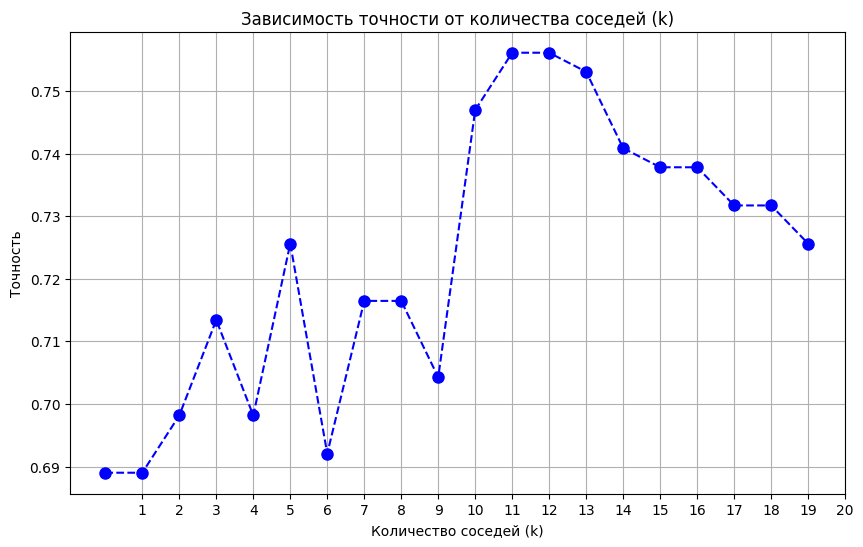

In [ ]:
# Инициализируем список для сохранения точности
accuracy_scores = []

# Попробуем разные значения k
for k in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(range(len(accuracy_scores)), accuracy_scores, marker='o', linestyle='dashed', color='blue', markersize=8)
plt.title('Зависимость точности от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [ ]:
final =

# Отели:

In [ ]:
from sklearn.datasets import fetch_california_housing
# Загрузим датасет
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

In [ ]:
# Выберем признаки и целевую переменную
X_reg = data.drop('PRICE', axis=1)
y_reg = data['PRICE']

In [ ]:
# Разделим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Инициализируем и обучим модель KNN регрессии
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Предсказание на тестовых данных
y_pred = knn_regressor.predict(X_test)

In [ ]:
# Оценка производительности модели
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.8205649468992249


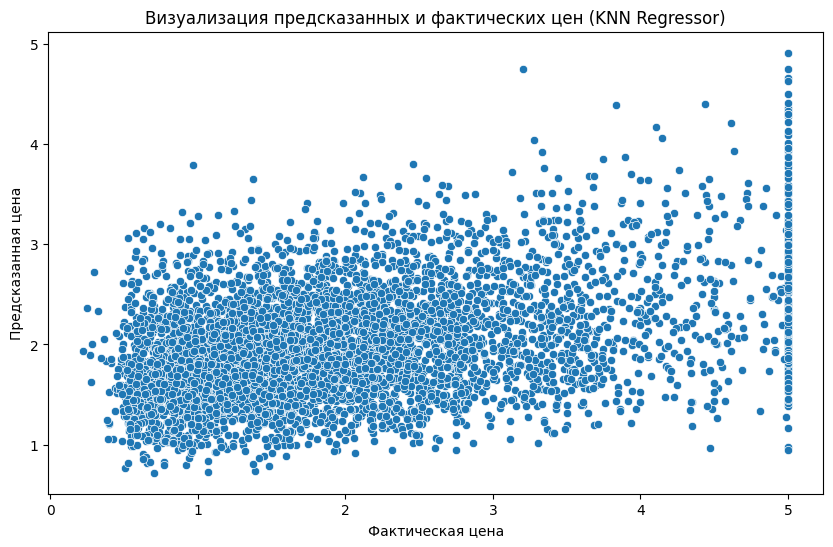

In [ ]:
# Визуализация предсказанных значений и фактических значений
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Фактическая цена')
plt.ylabel('Предсказанная цена')
plt.title('Визуализация предсказанных и фактических цен (KNN Regressor)')
plt.show()

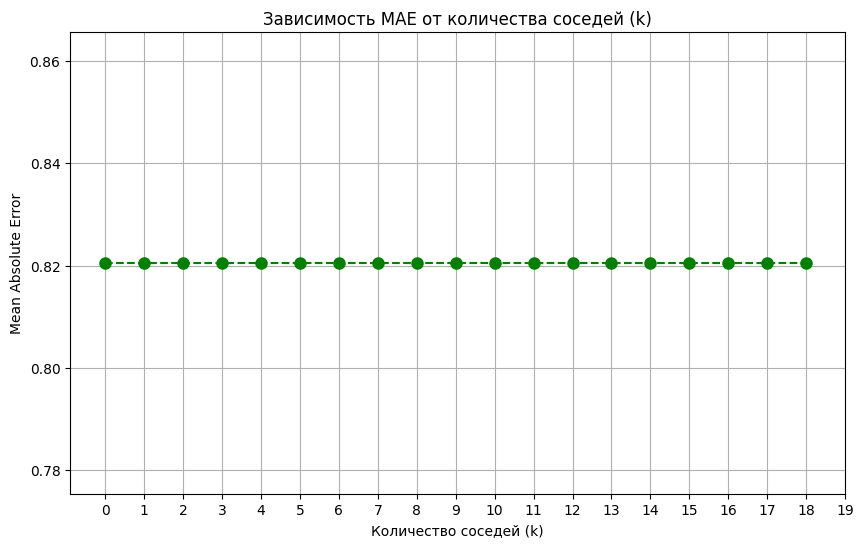

In [ ]:
# Инициализируем список для сохранения средней абсолютной ошибки
mae_scores = []

# Попробуем разные значения k
for k in range(1, 20):
    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(range(19), mae_scores, marker='o', linestyle='dashed', color='green', markersize=8)
plt.title('Зависимость MAE от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Mean Absolute Error')
plt.xticks(range(20))
plt.grid(True)
plt.show()